# **Project Tittle :Game playing agent - Ms.pac-Man using  Reinforcement Learning**

Preethi Manoharan

Nagapriya ganapathy

Jash pal


# **Business understanding :**  

The main aim of this project is to develop and compare reinforcement learning algorithms like Qlearning ,DQN, monte carlo ect to optimize the strategy for playing Ms. Pac-Man, focusing on maximizing the agent's score. It involves hyperparameter tuning to find the best combinations for each algorithm. The results will help improve AI in games, provide learning tools for teaching reinforcement learning, and contribute to AI research.

In [ ]:
!pip install gym --upgrade
!pip install gym[atari,accept-rom-license]
!pip install gymnasium==0.29.1 stable-baselines3==2.3.2 shimmy==0.2.1
!pip install gym==0.25.2
!pip install dopamine-rl==4.0.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827623 sha256=2822804c5d1251e2878b07a3a69c539dad8e1f4f294935c376770715764bc17e
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

We are using gym package to the latest version available.it is used for developing and comparing reinforcement learning algorithms.
We are also including additional dependences for attari games which includes the pac-man and accepts the ROM license which is needed for the attari games

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize environment
env = gym.make('MsPacman-v4')
initial_state = env.reset()

# Print the initial state details
print(f"Initial state type: {type(initial_state)}")
print(f"Type of item 0: {type(initial_state[0])}")
print(f"Shape of item 0: {initial_state[0].shape}")
print(f"Example of item 0: {initial_state[0]}")
print(f"Type of item 1: {type(initial_state[1])}")
print(f"Item 1 has no attribute 'shape'")
print(f"Example of item 1: {initial_state[1]}")


Initial state type: <class 'tuple'>
Type of item 0: <class 'numpy.ndarray'>
Shape of item 0: (210, 160, 3)
Example of item 0: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[228 111 111]
  [228 111 111]
  [228 111 111]
  ...
  [228 111 111]
  [228 111 111]
  [228 111 111]]

 [[228 111 111]
  [228 111 111]
  [228 111 111]
  ...
  [228 111 111]
  [228 111 111]
  [228 111 111]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
Type of item 1: <class 'dict'>
Item 1 has no attribute 'shape'
Example of item 1: {'lives': 3, 'episode_frame_number': 0, 'frame_number': 0}


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a 

we have initialized the Ms. Pac-Man environment v4 using gym which is the latest version .       
The initial state is a tuple containing two items: a NumPy array and a dictionary. The NumPy array, which represents the game's screen image, has a shape of (210, 160, 3) indicating 210 pixels in height, 160 pixels in width, and 3 color channels (RGB). The dictionary contains game metadata such as the number of lives left, the episode frame number, and the overall frame number.


# **1.1 Q learning Algorithim implementation:**

Here we are implementing Q-learning alogrithm by preprocessing,initiallizing and updating using the below funtions and enabling the agent to learn optimal actions in the environment.

1. **preprocess_state** : This funtion flattens the image part of the state for easier processing

2.  **initialize_Q:** This function creates a Q-table initialized with zeros to store Q-values for each state-action pair.

3. **update_Q**: function updates the Q-values in the Q-table using the Q-learning update rule, incorporating immediate rewards and discounted future rewards.

In [ ]:
def preprocess_state(state):
    """Flatten the state."""
    state_img = state[0]
    return state_img.flatten()

def initialize_Q(state_size, action_size):
    """Create a Q-table with dimensions state_size x action_size initialized to zeros."""
    return np.zeros((state_size, action_size))

def update_Q(Q, state, action, reward, next_state, lr=0.1, gamma=0.99):
    """Update Q-value for given state and action using the Q-learning update rule."""
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += lr * td_error
    return Q



**Hyperperameter tuning for Q-learning**
here we will perform hyperparameter tuning for the Q-learning algorithm in the "Ms. Pac-Man" environment. We define grids for learning rates, discount factors, and epsilon values. During training, the environment and Q-table are initialized, and episodes are executed where actions are selected using an epsilon-greedy policy. Q-values are updated using the Q-learning update rule. We calculate and store the average reward for each hyperparameter combination, aiming to identify the best hyperparameters for the Q-learning algorithm.


In [ ]:
# Define hyperparameter grids
learning_rates = [0.1, 0.01, 0.001]
discount_factors = [0.99, 0.95, 0.9]
epsilons = [0.1, 0.2, 0.3]

# Store results for analysis
tuning_results = []

# Hyperparameter tuning loop
for lr in learning_rates:
    for gamma in discount_factors:
        for epsilon in epsilons:
            # Initialize environment and Q-table
            env = gym.make('MsPacman-v4')
            initial_state = env.reset()
            processed_state = preprocess_state(initial_state)
            state_size = processed_state.shape[0]
            action_size = env.action_space.n
            Q = initialize_Q(state_size, action_size)

            # Training parameters
            total_episodes = 100
            rewards_list = []

            # Training loop
            for episode in range(total_episodes):
                initial_state = env.reset()
                state = preprocess_state(initial_state)
                state = int(np.argmax(state))  # Ensure state is an integer
                done = False
                total_reward = 0
                steps = 0

                while not done:
                    if np.random.rand() <= epsilon:
                        action = env.action_space.sample()
                    else:
                        action = np.argmax(Q[state])

                    result = env.step(action)
                    if len(result) == 4:
                        next_state, reward, done, _ = result
                    elif len(result) == 5:
                        next_state, reward, done, _, _ = result
                    else:
                        raise ValueError(f"Unexpected number of outputs from env.step(): {len(result)}")

                    next_state = preprocess_state(next_state)
                    next_state_index = int(np.argmax(next_state))  # Ensure next_state is an integer
                    Q = update_Q(Q, state, action, reward, next_state_index, lr=lr, gamma=gamma)
                    state = next_state_index
                    total_reward += reward
                    steps += 1

                rewards_list.append(total_reward)

            env.close()

            # Calculate average reward
            average_reward = sum(rewards_list) / total_episodes
            tuning_results.append((lr, gamma, epsilon, average_reward))
            print(f"lr: {lr}, gamma: {gamma}, epsilon: {epsilon}, average_reward: {average_reward}")



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


lr: 0.1, gamma: 0.99, epsilon: 0.1, average_reward: 518.2
lr: 0.1, gamma: 0.99, epsilon: 0.2, average_reward: 577.3
lr: 0.1, gamma: 0.99, epsilon: 0.3, average_reward: 565.1
lr: 0.1, gamma: 0.95, epsilon: 0.1, average_reward: 535.0
lr: 0.1, gamma: 0.95, epsilon: 0.2, average_reward: 547.3
lr: 0.1, gamma: 0.95, epsilon: 0.3, average_reward: 553.6
lr: 0.1, gamma: 0.9, epsilon: 0.1, average_reward: 520.2
lr: 0.1, gamma: 0.9, epsilon: 0.2, average_reward: 643.8
lr: 0.1, gamma: 0.9, epsilon: 0.3, average_reward: 650.8
lr: 0.01, gamma: 0.99, epsilon: 0.1, average_reward: 455.3
lr: 0.01, gamma: 0.99, epsilon: 0.2, average_reward: 459.2
lr: 0.01, gamma: 0.99, epsilon: 0.3, average_reward: 487.9
lr: 0.01, gamma: 0.95, epsilon: 0.1, average_reward: 407.8
lr: 0.01, gamma: 0.95, epsilon: 0.2, average_reward: 522.5
lr: 0.01, gamma: 0.95, epsilon: 0.3, average_reward: 574.7
lr: 0.01, gamma: 0.9, epsilon: 0.1, average_reward: 406.9
lr: 0.01, gamma: 0.9, epsilon: 0.2, average_reward: 509.5
lr: 0.01, g

In the output you can see that the average rewards for various combinations of learning rates, discount factors, and epsilon values. It helps to determine the best-performing hyperparameters for the Q-learning algorithm. For instance, the combination of learning rate (lr) 0.1, discount factor (gamma) 0.9, and epsilon 0.3 yielded the highest average reward of 650.8. These results guide the selection of hyperparameters that maximize the algorithm's performance in the "Ms. Pac-Man" environment.

Best hyperparameters: lr=0.1, gamma=0.9, epsilon=0.3 with average reward=650.8


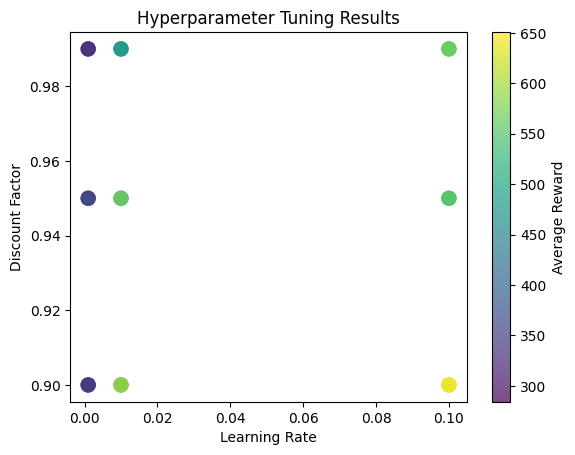

In [ ]:
# Analyze and visualize tuning results
best_params = max(tuning_results, key=lambda x: x[3])
print(f"Best hyperparameters: lr={best_params[0]}, gamma={best_params[1]}, epsilon={best_params[2]} with average reward={best_params[3]}")

# Plot results
lrs, gammas, epsilons, rewards = zip(*tuning_results)
fig, ax = plt.subplots()
scatter = ax.scatter(lrs, gammas, c=rewards, s=100, cmap='viridis', alpha=0.7)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Discount Factor')
ax.set_title('Hyperparameter Tuning Results')
plt.colorbar(scatter, label='Average Reward')
plt.show()

The graph shows hyperparameter tuning results for the Q-learning algorithm on "Ms. Pac-Man". The X-axis represents the learning rate (lr) and the Y-axis represents the discount factor (gamma). Each point's color indicates the average reward, with green indicating higher rewards and purple indicating lower rewards. The optimal combination found is lr=0.1, gamma=0.9, epsilon=0.3, with an average reward of 650.8, represented by one of the brightest green points. This visualization helps identify the best hyperparameters quickly.

# **DQN Algorithm implementation**
Here we perform hyperparameter tuning for the DQN algorithm on the MsPacman-v4 environment. It iterates through various combinations of learning rates, discount factors, and exploration fractions, initializing and training the DQN model for each set. The model is trained for 10,000 timesteps and then evaluated over 10 episodes to measure its performance. The mean reward for each hyperparameter combination is stored and printed, allowing the identification of the best set of hyperparameters.

In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

# Define hyperparameter grids
learning_rates = [0.1, 0.01, 0.001]
discount_factors = [0.99, 0.95, 0.9]
epsilons = [0.1, 0.2, 0.3]

# Store results for analysis
tuning_results_dqn = []

# Hyperparameter tuning loop for DQN
for lr in learning_rates:
    for gamma in discount_factors:
        for epsilon in epsilons:
            # Initialize environment and DQN model
            env = gym.make('MsPacman-v4')
            model = DQN('CnnPolicy', env, learning_rate=lr, gamma=gamma, exploration_fraction=epsilon,buffer_size=50000, verbose=1)

            # Train the model
            model.learn(total_timesteps=50000)

            # Evaluate the model
            mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

            # Store the results
            tuning_results_dqn.append((lr, gamma, epsilon, mean_reward))
            print(f"DQN - lr: {lr}, gamma: {gamma}, epsilon: {epsilon}, mean_reward: {mean_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 619      |
|    ep_rew_mean      | 280      |
|    exploration_rate | 0.53     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 307      |
|    time_elapsed     | 8        |
|    total_timesteps  | 2475     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.297    |
|    n_updates        | 593      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 685      |
|    ep_rew_mean      | 394      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 268      |
|    time_elapsed     | 20       |
|    total_timesteps  | 

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.19GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 637      |
|    ep_rew_mean      | 225      |
|    exploration_rate | 0.758    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 311      |
|    time_elapsed     | 8        |
|    total_timesteps  | 2547     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.303    |
|    n_updates        | 611      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 684      |
|    ep_rew_mean      | 289      |
|    exploration_rate | 0.48     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 297      |
|    time_elapsed     | 18       |
|    total_timesteps  | 5475     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.296    |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.16GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 562      |
|    ep_rew_mean      | 178      |
|    exploration_rate | 0.858    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 306      |
|    time_elapsed     | 7        |
|    total_timesteps  | 2247     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.294    |
|    n_updates        | 536      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 609      |
|    ep_rew_mean      | 215      |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 297      |
|    time_elapsed     | 16       |
|    total_timesteps  | 4870     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.298    |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.12GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 829      |
|    ep_rew_mean      | 588      |
|    exploration_rate | 0.37     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 269      |
|    time_elapsed     | 12       |
|    total_timesteps  | 3316     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.00231  |
|    n_updates        | 803      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 853      |
|    ep_rew_mean      | 685      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 243      |
|    time_elapsed     | 27       |
|    total_timesteps  | 6821     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.00298  |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.13GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 721      |
|    ep_rew_mean      | 275      |
|    exploration_rate | 0.726    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 270      |
|    time_elapsed     | 10       |
|    total_timesteps  | 2885     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.299    |
|    n_updates        | 696      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 665      |
|    ep_rew_mean      | 270      |
|    exploration_rate | 0.494    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 259      |
|    time_elapsed     | 20       |
|    total_timesteps  | 5323     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.0027   |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.08GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 589      |
|    ep_rew_mean      | 190      |
|    exploration_rate | 0.552    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 256      |
|    time_elapsed     | 9        |
|    total_timesteps  | 2356     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 1.18     |
|    n_updates        | 563      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 641      |
|    ep_rew_mean      | 352      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 233      |
|    time_elapsed     | 21       |
|    total_timesteps  | 5128     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.299    |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.09GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 700      |
|    ep_rew_mean      | 318      |
|    exploration_rate | 0.734    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 271      |
|    time_elapsed     | 10       |
|    total_timesteps  | 2800     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.591    |
|    n_updates        | 674      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 701      |
|    ep_rew_mean      | 314      |
|    exploration_rate | 0.467    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 256      |
|    time_elapsed     | 21       |
|    total_timesteps  | 5606     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.893    |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.10GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 637      |
|    ep_rew_mean      | 215      |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 276      |
|    time_elapsed     | 9        |
|    total_timesteps  | 2549     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.89     |
|    n_updates        | 612      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 645      |
|    ep_rew_mean      | 230      |
|    exploration_rate | 0.673    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 269      |
|    time_elapsed     | 19       |
|    total_timesteps  | 5157     |
| train/              |          |
|    learning_rate    | 0.1      |
|    loss             | 0.000906 |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.08GB > 9.07GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 698      |
|    ep_rew_mean      | 245      |
|    exploration_rate | 0.823    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 273      |
|    time_elapsed     | 10       |
|    total_timesteps  | 2790     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.297    |
|    n_updates        | 672      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 710      |
|    ep_rew_mean      | 276      |
|    exploration_rate | 0.64     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 265      |
|    time_elapsed     | 21       |
|    total_timesteps  | 5680     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0023   |
|    n_updates      

In the output, you can see that the average rewards for various combinations of learning rates, discount factors, and epsilon values helped to determine the best-performing hyperparameters for the DQN algorithm. For instance, the combination of learning rate (lr) 0.001, discount factor (gamma) 0.95, and epsilon 0.2 yielded the highest average reward of 758.0.

Best hyperparameters for DQN: lr=0.001, gamma=0.95, epsilon=0.2 with mean reward=758.0


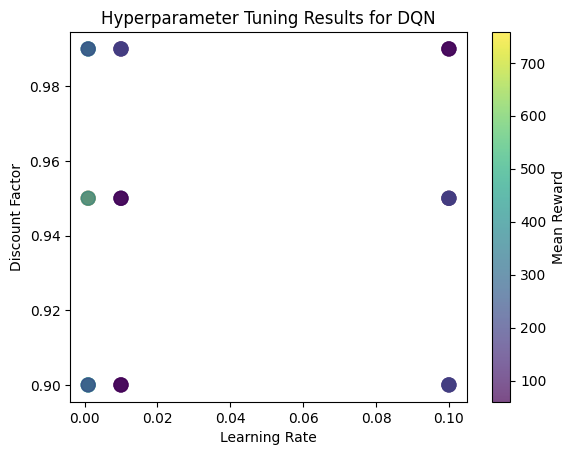

In [ ]:
# Analyze and visualize tuning results
best_params_dqn = max(tuning_results_dqn, key=lambda x: x[3])
print(f"Best hyperparameters for DQN: lr={best_params_dqn[0]}, gamma={best_params_dqn[1]}, epsilon={best_params_dqn[2]} with mean reward={best_params_dqn[3]}")

# Plot results
lrs, gammas, epsilons, rewards = zip(*tuning_results_dqn)
fig, ax = plt.subplots()
scatter = ax.scatter(lrs, gammas, c=rewards, s=100, cmap='viridis', alpha=0.7)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Discount Factor')
ax.set_title('Hyperparameter Tuning Results for DQN')
plt.colorbar(scatter, label='Mean Reward')
plt.show()

As we see the graph, the point with the highest mean reward (758.0) corresponds to the combination of learning rate (lr) 0.001, discount factor (gamma) 0.95, and epsilon 0.2, as indicated by the darker color near the top left of the graph.

# **Comparative Analysis of DQN and Q-learning Performance Across Hyperparameters**

In [ ]:
import pandas as pd

# Combine results into dataframes
df_dqn = pd.DataFrame(tuning_results_dqn, columns=['learning_rate', 'gamma', 'epsilon', 'mean_reward'])
df_qlearning = pd.DataFrame(tuning_results, columns=['learning_rate', 'gamma', 'epsilon', 'mean_reward'])

# Add a column to indicate the algorithm
df_dqn['algorithm'] = 'DQN'
df_qlearning['algorithm'] = 'Q-learning'

# Combine both dataframes
df_combined = pd.concat([df_dqn, df_qlearning])

# Print the combined results
print(df_combined)

# Analyze the results
# Group by algorithm and calculate the mean of the mean_reward
performance_comparison = df_combined.groupby('algorithm')['mean_reward'].mean()

print(performance_comparison)


    learning_rate  gamma  epsilon  mean_reward   algorithm
0           0.100   0.99      0.1         60.0         DQN
1           0.100   0.99      0.2         90.0         DQN
2           0.100   0.99      0.3         70.0         DQN
3           0.100   0.95      0.1         60.0         DQN
4           0.100   0.95      0.2         90.0         DQN
5           0.100   0.95      0.3        210.0         DQN
6           0.100   0.90      0.1        210.0         DQN
7           0.100   0.90      0.2         70.0         DQN
8           0.100   0.90      0.3        210.0         DQN
9           0.010   0.99      0.1         70.0         DQN
10          0.010   0.99      0.2         90.0         DQN
11          0.010   0.99      0.3        210.0         DQN
12          0.010   0.95      0.1        210.0         DQN
13          0.010   0.95      0.2         60.0         DQN
14          0.010   0.95      0.3         70.0         DQN
15          0.010   0.90      0.1         70.0         D


DQN: The mean reward is approximately 202.07.

**Q-learning: The mean reward is approximately 468.52.**

based on the comparation the performance of DQN and Q-learning algorithms by evaluating their average rewards across different hyperparameter settings. we found that Q-learning performed better than DQN. Even though DQN achieved the highest single reward in one of its tests.

## **Box plot representation**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


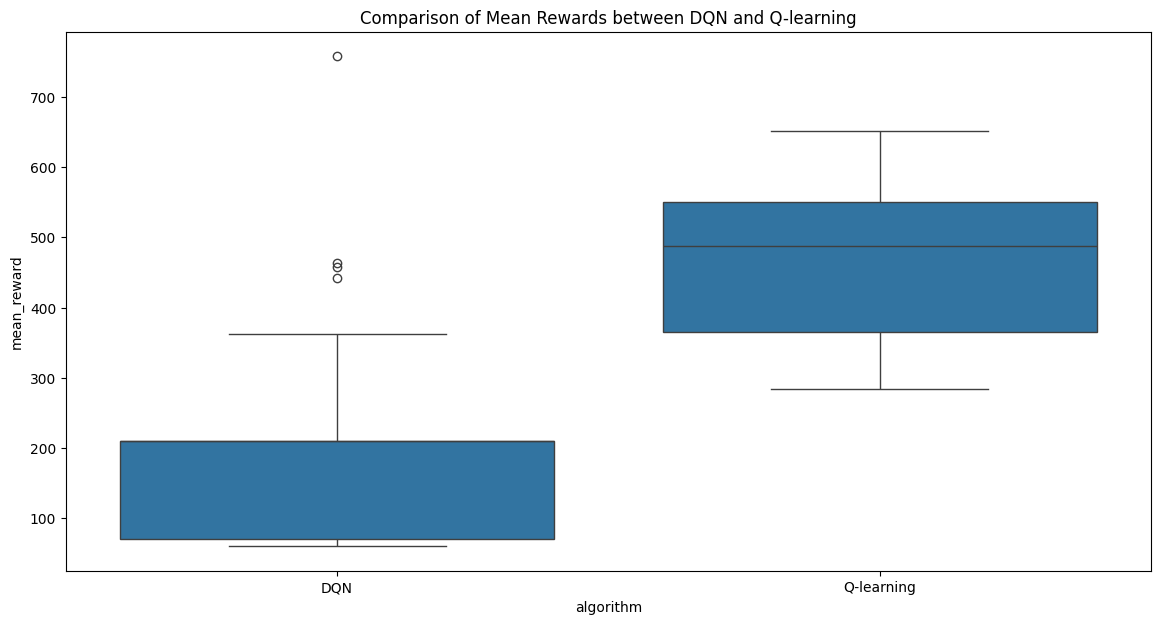

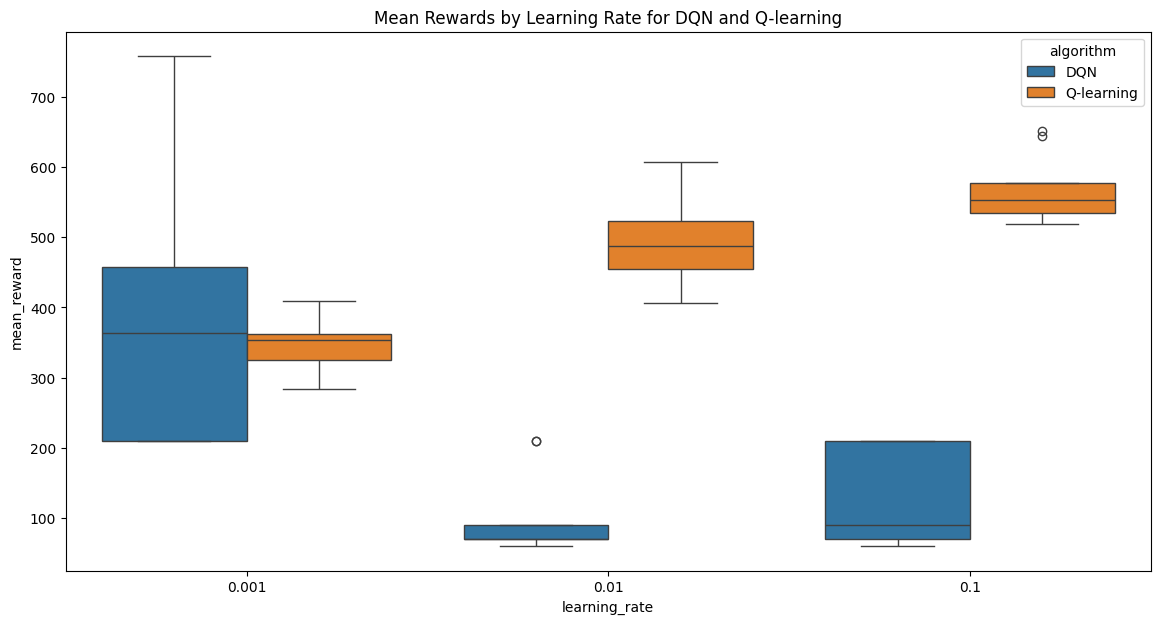

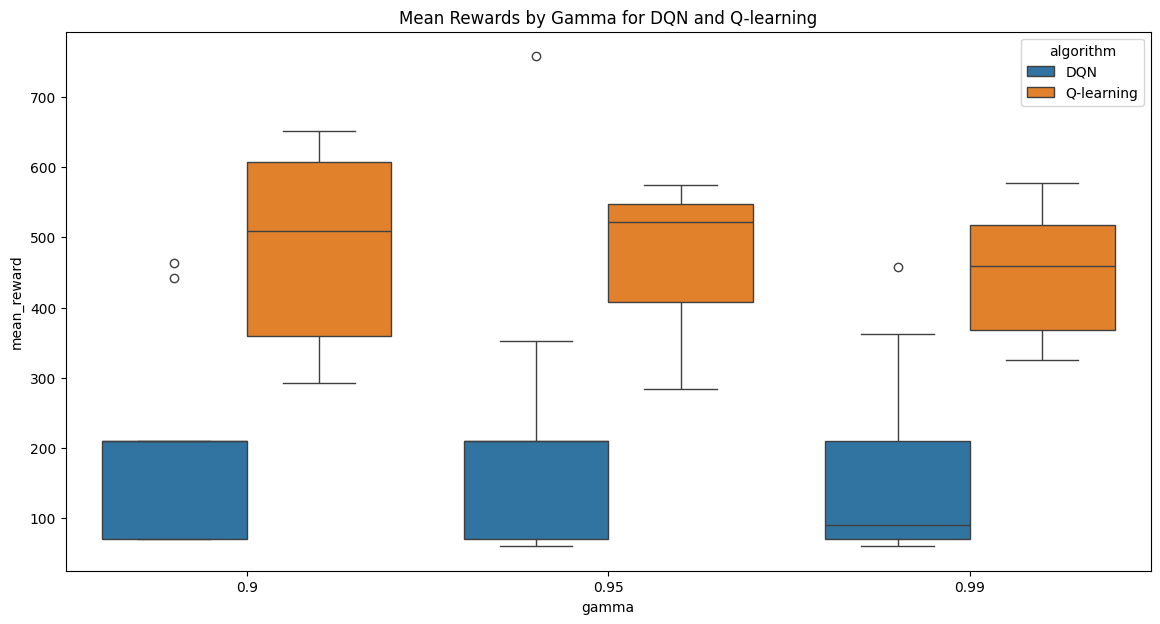

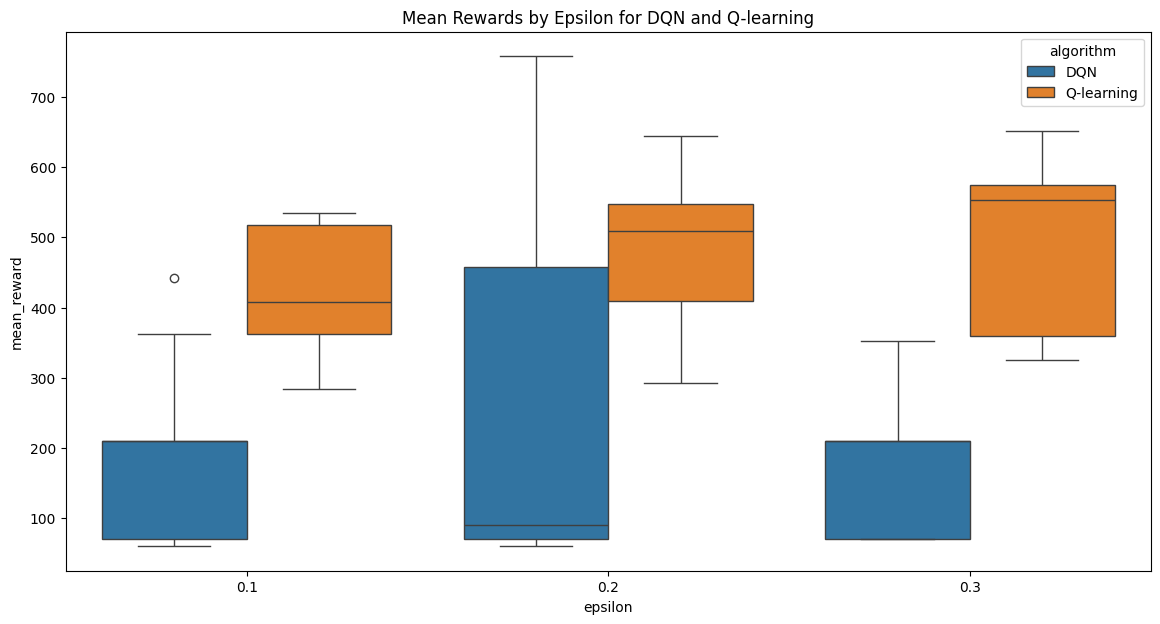

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the results into one DataFrame for easy comparison
df_dqn = pd.DataFrame(tuning_results_dqn, columns=['learning_rate', 'gamma', 'epsilon', 'mean_reward'])
df_dqn['algorithm'] = 'DQN'

df_qlearning = pd.DataFrame(tuning_results, columns=['learning_rate', 'gamma', 'epsilon', 'mean_reward'])
df_qlearning['algorithm'] = 'Q-learning'

df_combined = pd.concat([df_dqn, df_qlearning])

# Plotting
plt.figure(figsize=(14, 7))

# Plot mean rewards by algorithm
sns.boxplot(x='algorithm', y='mean_reward', data=df_combined)
plt.title('Comparison of Mean Rewards between DQN and Q-learning')
plt.show()

# Plot mean rewards by learning rate for both algorithms
plt.figure(figsize=(14, 7))
sns.boxplot(x='learning_rate', y='mean_reward', hue='algorithm', data=df_combined)
plt.title('Mean Rewards by Learning Rate for DQN and Q-learning')
plt.show()

# Plot mean rewards by gamma for both algorithms
plt.figure(figsize=(14, 7))
sns.boxplot(x='gamma', y='mean_reward', hue='algorithm', data=df_combined)
plt.title('Mean Rewards by Gamma for DQN and Q-learning')
plt.show()

# Plot mean rewards by epsilon for both algorithms
plt.figure(figsize=(14, 7))
sns.boxplot(x='epsilon', y='mean_reward', hue='algorithm', data=df_combined)
plt.title('Mean Rewards by Epsilon for DQN and Q-learning')
plt.show()


# **Comparison of Mean Rewards between DQN and Q-learning:**
Q-learning consistently outperformed DQN, as evidenced by higher mean rewards across most hyperparameter configurations.

# **Mean Rewards by Learning Rate:**
At a learning rate of 0.001, DQN showed a wider variance in performance, with some high outliers but generally lower rewards compared to Q-learning.
Q-learning demonstrated more stable and higher rewards, particularly at learning rates of 0.01 and 0.1.

# **Mean Rewards by Gamma (Discount Factor):**
Across all gamma values (0.9, 0.95, 0.99), Q-learning had higher median rewards compared to DQN.
DQN showed lower and more varied performance, indicating less stability and effectiveness.

# **Mean Rewards by Epsilon:**
For epsilon values 0.1, 0.2, and 0.3, Q-learning consistently achieved higher rewards.
DQN showed significant variability, especially at epsilon 0.2, where it had both very high and very low rewards.


# **Conclusion:**

Overall, Q-learning not only achieved higher average rewards but also demonstrated more stable performance across different hyperparameters compared to DQN. This suggests that Q-learning is better suited for this particular problem or environment given the current hyperparameter settings.